In [1]:
# Load, explore and plot data
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns

# Text pre-processing
import re
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
PS = PorterStemmer()
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
STOPWORDS=set(stopwords.words('english'))
lemmatizer= WordNetLemmatizer()

In [2]:
#cyber security tweets
cyber_tweets = pd.read_csv('/home/ubuntu/Desktop/cyber_security/text_classification_corpus/cybersecurity_tweets.csv')

In [3]:
#non cyber security tweets
non_cyber_tweets = pd.read_csv('/home/ubuntu/Desktop/cyber_security/text_classification_corpus/not_cybersecurity_tweets.csv')

In [4]:
# append both dataframe
df = cyber_tweets.append(non_cyber_tweets,ignore_index=True)

In [5]:
df

,text,label
0,#AI Robo-Advisers and the Future of Financial ...,1
1,Hackers causing havoc on Mexican banking syste...,1
2,CVE-2019-13127 An issue was discovered in mxGr...,1
3,How to protect your online identity #labourcyb...,1
4,Forensic Acquisition - Shadow Cyber Sec https...,1
...,...,...
399995,Attackers Test Weak Passwords in Purple Fox Ma...,0
399996,Aviso para los usuarios de correo de @AytoMurc...,0
399997,NPM had an obfuscated birthday-like easter egg...,0
399998,CPUの脆弱性「Spectre」に対応してAMDがリリースしたパッチに問題があることをInt...,0


In [6]:
# printing the information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    400000 non-null  object
 1   label   400000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [7]:
#description of the dataframe
df.describe(include = 'object')

,text
count,400000
unique,390161
top,Our Ddos service! Please use the grardstresser...
freq,149


In [8]:
#dropping the duplicates
df.drop_duplicates(inplace = True)

In [9]:
# checking the missing values
df.isna().sum()

text     0
label    0
dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

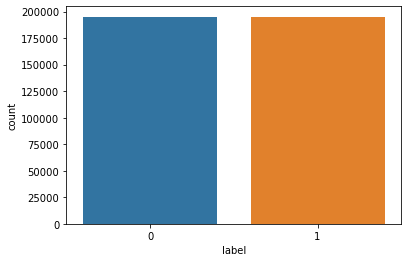

In [10]:
# checking the data is balanced or not
sns.countplot(x ='label', data = df)

In [11]:
# text preprcessing
def tokenize(text):
    
    text = re.sub(r'http\S+', '', text)

    text = re.sub("[^a-zA-Z]", " ", text.lower())#panctuations
    
    tokens = word_tokenize(text) #split text into words
    
    words = [w for w in tokens if w not in STOPWORDS] #remove stopwords
    
    lemmed_words = [lemmatizer.lemmatize(w) for w in words] #lemmatizing  Base meaning
    
    clean_tokens = []
    
    for i in lemmed_words: #appending all the lemmed words to clean_tokens
        clean_tokens.append(i)
        
    text = " ".join(clean_tokens) #joining text in cleaned tokens based on white spaces
    
    return text

In [12]:
# A package which efficiently applies any function to a pandas dataframe or series in the fastest available manner
import swifter
df['cleaned_text'] = df['text'].swifter.apply(lambda x:tokenize(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [13]:
df

,text,label,cleaned_text
0,#AI Robo-Advisers and the Future of Financial ...,1,ai robo adviser future financial advice datapr...
1,Hackers causing havoc on Mexican banking syste...,1,hacker causing havoc mexican banking system cy...
2,CVE-2019-13127 An issue was discovered in mxGr...,1,cve issue discovered mxgraph related diagram p...
3,How to protect your online identity #labourcyb...,1,protect online identity labourcyberattack cybe...
4,Forensic Acquisition - Shadow Cyber Sec https...,1,forensic acquisition shadow cyber sec cybersec...
...,...,...,...
399995,Attackers Test Weak Passwords in Purple Fox Ma...,0,attacker test weak password purple fox malware...
399996,Aviso para los usuarios de correo de @AytoMurc...,0,aviso para los usuarios de correo de aytomurci...
399997,NPM had an obfuscated birthday-like easter egg...,0,npm obfuscated birthday like easter egg mistak...
399998,CPUの脆弱性「Spectre」に対応してAMDがリリースしたパッチに問題があることをInt...,0,cpu spectre amd intel gigazine intelcpu


In [63]:
df['cleaned_text'][0]

'ai robo adviser future financial advice dataprotection privacy infosec cybersecurity bigdata ai'

In [14]:
# dropping uncleaned data in the dataframe
df.drop(columns='text',inplace=True)

In [15]:
df

,label,cleaned_text
0,1,ai robo adviser future financial advice datapr...
1,1,hacker causing havoc mexican banking system cy...
2,1,cve issue discovered mxgraph related diagram p...
3,1,protect online identity labourcyberattack cybe...
4,1,forensic acquisition shadow cyber sec cybersec...
...,...,...
399995,0,attacker test weak password purple fox malware...
399996,0,aviso para los usuarios de correo de aytomurci...
399997,0,npm obfuscated birthday like easter egg mistak...
399998,0,cpu spectre amd intel gigazine intelcpu


In [16]:
#description of the dataframe
df.describe(include = 'object')

,cleaned_text
count,390162
unique,299991
top,saman staan sterk tegen de vaccinatieplicht la...
freq,790


In [17]:
#dropping the duplicates
df.drop_duplicates(inplace = True)

In [18]:
df

,label,cleaned_text
0,1,ai robo adviser future financial advice datapr...
1,1,hacker causing havoc mexican banking system cy...
2,1,cve issue discovered mxgraph related diagram p...
3,1,protect online identity labourcyberattack cybe...
4,1,forensic acquisition shadow cyber sec cybersec...
...,...,...
399993,0,creating company data breach response plan dat...
399996,0,aviso para los usuarios de correo de aytomurci...
399997,0,npm obfuscated birthday like easter egg mistak...
399998,0,cpu spectre amd intel gigazine intelcpu


In [19]:
# Get the Independent Features
x=df.drop('label',axis=1)

In [20]:
# get dependent features
y=df['label']

# Train test split

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x['cleaned_text'],y,test_size=0.2, random_state=25)

# Tokenization

In [22]:
# Defining pre-processing parameters
max_len = 50 
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 500

In [23]:
#The Tokenizer API from TensorFlow Keras can split sentences into words and encode them into integers.
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = vocab_size, 
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(x_train)

2023-01-14 09:40:34.491893: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-14 09:40:35.203221: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-14 09:40:35.203271: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-14 09:40:37.110862: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [76]:
#saving tokenizer
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
# with open('tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

In [24]:
# Get the word_index
word_index = tokenizer.word_index
total_words = len(word_index)
total_words

198763

# Sequence and padding

In [25]:
#importing pad sequences for 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
#representing  each sentence by sequences of numbers using texts_to_sequencesfrom Tokenizer object
#for train data
training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

In [27]:
# for test data
testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [28]:
#The shape of training and testing padded (tensor):
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (240013, 50)
Shape of testing tensor:  (60004, 50)


# Define the model architecture and train the model

In [32]:
#import model dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Embedding, Dropout, GlobalAveragePooling1D,Flatten,SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
# Define parameter
embedding_dim = 16
drop_value = 0.2
n_dense = 24
n_lstm = 128
drop_lstm = 0.2

# Define LSTM Model 
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model1.add(SpatialDropout1D(drop_lstm))
model1.add(LSTM(n_lstm, return_sequences=False))
model1.add(Dropout(drop_lstm))
model1.add(Dense(1, activation='sigmoid'))

In [34]:
#summary of the model
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            8000      
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 16)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               74240     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 82,369
Trainable params: 82,369
Non-trainable params: 0
__________________________________________________

In [35]:
# Compile the model
model1.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [36]:
# Train the model:
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(training_padded,
                     y_train,
                     epochs=10, 
                     validation_data=(testing_padded, y_test),
                     callbacks =[early_stop],
                     verbose=2)

Epoch 1/10


2023-01-14 09:56:32.170669: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 48002600 exceeds 10% of free system memory.


7501/7501 - 339s - loss: 0.1147 - accuracy: 0.9657 - val_loss: 0.0900 - val_accuracy: 0.9737 - 339s/epoch - 45ms/step
Epoch 2/10
7501/7501 - 357s - loss: 0.0828 - accuracy: 0.9751 - val_loss: 0.0734 - val_accuracy: 0.9758 - 357s/epoch - 48ms/step
Epoch 3/10
7501/7501 - 356s - loss: 0.0747 - accuracy: 0.9758 - val_loss: 0.0719 - val_accuracy: 0.9761 - 356s/epoch - 47ms/step
Epoch 4/10
7501/7501 - 373s - loss: 0.0715 - accuracy: 0.9763 - val_loss: 0.0701 - val_accuracy: 0.9761 - 373s/epoch - 50ms/step
Epoch 5/10
7501/7501 - 388s - loss: 0.0696 - accuracy: 0.9772 - val_loss: 0.0681 - val_accuracy: 0.9781 - 388s/epoch - 52ms/step
Epoch 6/10
7501/7501 - 371s - loss: 0.0673 - accuracy: 0.9783 - val_loss: 0.0675 - val_accuracy: 0.9782 - 371s/epoch - 50ms/step
Epoch 7/10
7501/7501 - 372s - loss: 0.0654 - accuracy: 0.9787 - val_loss: 0.0663 - val_accuracy: 0.9780 - 372s/epoch - 50ms/step
Epoch 8/10
7501/7501 - 394s - loss: 0.0641 - accuracy: 0.9795 - val_loss: 0.0657 - val_accuracy: 0.9786 - 39

In [37]:
#saving lstm model
model1.save('lstm_model.h5')

In [72]:
# preprocessing the test data
def prediction(text):                     
    ctext = tokenize(text)
    tokenized_text = tokenizer.texts_to_sequences(np.array([ctext]))
    vector = pad_sequences(tokenized_text, maxlen=50)
    return vector

vector = prediction('aviso para los usuarios de correo de aytomurcia recibido correo con intento phishing seguridad alertas ciberseguridad')

In [79]:
# model prediction
prediction = model1.predict(vector)
if np.round(prediction) == 0:
    print('non cyber security tweets')
else:
    print('cyber security tweets')

1/1 [==============================] - 0s 24ms/step
cyber security tweets
